# IS318 - Machine Learning

## TP1 - Linear regression  
## Authors : Elkarchi Jad & Wardi Mohamed Amine

The goal of this TP is to experiment with linear regression and polynomial linear regression.

First, we will work **without** the use of external libraries (such as `scikit-learn`).

In [321]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset

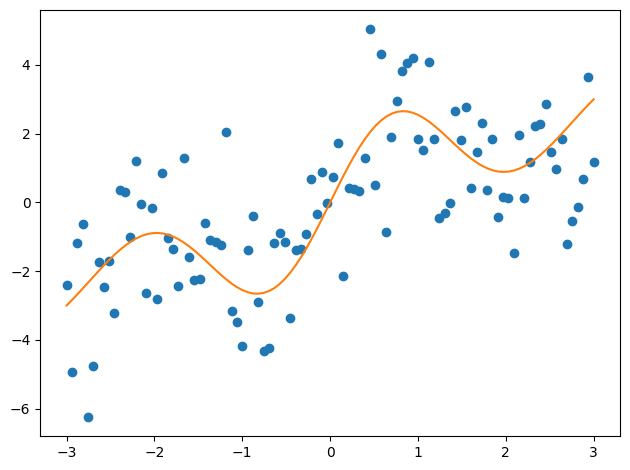

In [322]:
# Let us generate data points from a relatively complicated function
N = 100
alpha, sigma = 2., 3.
X = np.linspace(-3, 3, num=N)
y = X + (alpha * np.sin((2. * np.pi * X) / sigma) * np.exp(-(X ** 2) / (sigma ** 2)))
# Add some random noise
rng = np.random.default_rng(42)
y_noisy = y + rng.standard_normal(N) * 2.
# Show the data points
plt.figure()
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
plt.tight_layout()
plt.show()
plt.close()

**(Question)** Shuffle and split the dataset into training (75%) and validation (25%) sets. Store the results into variables `X_train`, `y_train`, `X_valid`, `y_valid`.

*Hint:* you can use `rng.permutation` to generate a random permutation of the points.

In [323]:
# shuffling
permutation_indices = rng.permutation(len(X))
X_shuffled = X[permutation_indices]
y_shuffled = y_noisy[permutation_indices]

# splitting by 75% for training and 25% for validation
split_percentile = len(X_shuffled)*75//100
X_train, X_valid = X_shuffled[:split_percentile], X_shuffled[split_percentile:]
y_train, y_valid = y_shuffled[:split_percentile], y_shuffled[split_percentile:]

In [324]:
assert X_train.shape == (75,)
assert y_train.shape == (75,)
assert X_valid.shape == (25,)
assert y_valid.shape == (25,)
assert np.any(X_valid != X[75:]) # points should be shuffled

### 2. Linear regression in 1D

Recall the 1D linear regression model, where we search for parameters $w_0, w_1$ that will satisfy $y_i = w_0 + w_1 x_i$ (for all $i$ in the training set).

To simplify calculations, we usually set $\textbf{w} = [w_0, w_1]^T$ and $\textbf{x}_i = [1, x_i]^T$.

Then we have $y_i = \textbf{w}^T \textbf{x}_i $.

**(Question)** Add a column with ones to the points in `X_train` and `X_valid`. Store the result in new variables `X_train_ones` and `X_valid_ones`:

In [325]:
# appending a column to the features set in training and validation sets
X_train_ones = np.column_stack((np.ones_like(X_train), X_train))
X_valid_ones = np.column_stack((np.ones_like(X_valid), X_valid))

X_train_ones.shape

(75, 2)

**(Question)** Use normal equations to find the parameters that minimize the mean squared error on the training set.

In [326]:
# Applying the normal equation to find w
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_ones.T, X_train_ones)), X_train_ones.T), y_train)

# the weights solving the previous normal equation are :
print("w :", w)

w : [-0.03550166  0.68680383]


In [327]:
assert w.shape == (2,)

**(Question)** Plot the fitted line on top of the data points. Explain the result. (complete the code and answer in the cell below)

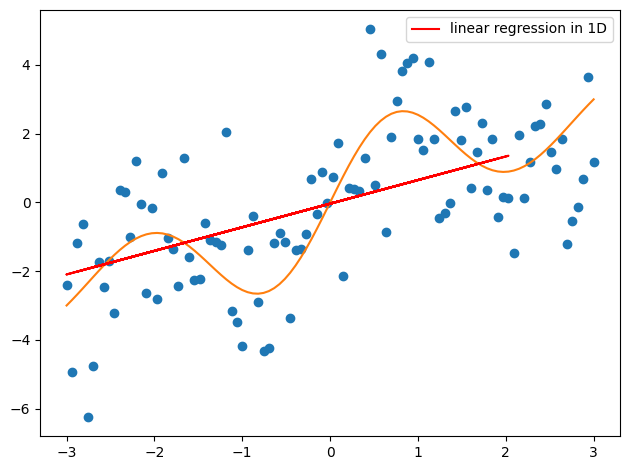

In [328]:
# Show the fitted line
plt.figure()
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
# plotting our prediction line
plt.plot(X_valid, np.dot(w, X_valid_ones.T), color='red', label="linear regression in 1D")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

## **Answer :** 
**The plot above show a straight line model that allow us the have a vague idea about the data distribution. Although it doesn't represent the data points accurately (underfitting) it does follow the distribution in 1D, which is something to be expected when using a 1 dimension normal equation.**

**(Question)** Plot the loss function landscape. What can you conclude from this visualization? (complete the code and answer in the cell below)

*Hint: the loss landscape can be represented by a 2D map (for example of size 100x100) where in each coordinate $(w_0, w_1)$ the value is mean squared error for these parameters. You can use `plt.contourf` to visualize the result.*

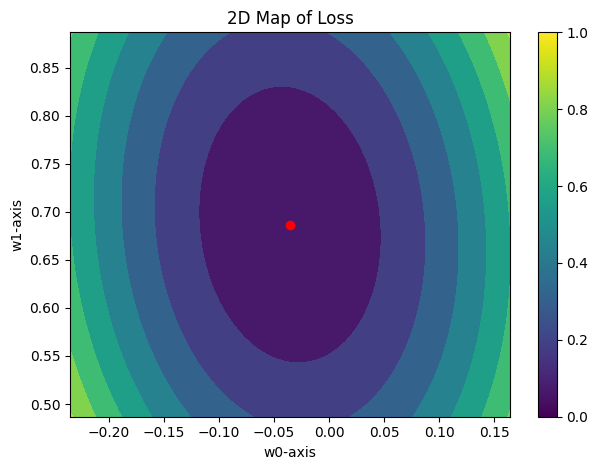

In [329]:
# creating the intervals for w 
w0 = np.linspace(w[0]-0.2, w[0]+0.2, 100)
w1 = np.linspace(w[1]-0.2, w[1]+0.2, 100)

# creating the loss map
loss = np.empty((100, 100))

# calculating the loss for each combination
for i in range(100) :
    for j in range(100) :
        loss[i, j] = np.mean((y_train - np.dot(X_train_ones, np.array([w0[i], w1[j]])))**2)

assert loss.shape == (100, 100)

# Create a grid of points
X_mesh, Y_mesh = np.meshgrid(w0, w1)

# Create a contour plot
plt.figure()
plt.contourf(X_mesh, Y_mesh, loss, cmap='viridis')
plt.scatter(w[0], w[1], color="red")
plt.colorbar()
plt.xlabel('w0-axis')
plt.ylabel('w1-axis')
plt.title('2D Map of Loss')
plt.tight_layout()
plt.show()
plt.close()

## Answer :
**As we can see from the 2D loss map, the calculated w (the red dot) parameter is indeed in the minimal part of the Map. This figure also shows that the further we go from the minimal point the greater the loss value.**

### 3. Polynomial linear regression

We move on the polynomial linear regression model with degree $D$, where the relationship between $y_i$ and $x_i$ is
$ y_i = w_0 + w_1x_i + w_2x_i^2 + \ldots + w_D x_i^D $

With $\textbf{w} = [w_0, \ldots, w_D]^T$ and $\textbf{x}_i = [1, x_i, x_i^2, \ldots, x_i^D]^T$, we have $y_i = \textbf{w}^T \textbf{x}_i $.

$D \geq 1$ is an hyperparameter of the model.

**(Question)** Complete the following `PolynomialRegression` class

In [330]:
class PolynomialRegression():
    def __init__(self, D=1):
        assert D >=1
        self.D = D
        
    def fit(self, X, y):
        '''Apply polynomial linear regression to fit `X` to `y`.
        The result should be stored in an attribute `w`.'''
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        
    def predict(self, X):
        '''Assuming the model has already been fit, return
        predicted `y` values for given `X`.'''
        # checking if w attribute exists
        if not hasattr(self, 'w') :
            raise AttributeError("fit the model before predicting X")
        return np.dot(X, self.w)

    def make_poly(self, X):
        '''Augment a dataset of 1D points (vector of size N) to its
        data matrix in polynomial form, including the zero column 
        (matrix of size N x D+1). Return the data matrix.'''
        assert X.ndim == 1
        # generates a D+1 dimesion arrays for each value in the X array.
        return np.vander(X, self.D+1, increasing=True)

**(Question)** Implement the mean squared error function to measure the quality of predictions.

In [331]:
def mean_squared_error(y_true, y_pred):
    '''Return the mean squared error between `y_true` and `y_pred`.'''
    assert y_true.shape == y_pred.shape
    return np.mean((y_pred - y_true)**2)

In [332]:
a, b = np.random.randn(10), np.random.randn(10)
assert mean_squared_error(a, b) >= 0.
assert mean_squared_error(a, a) == 0.

**(Question)** Apply the polynomial regression model with $D=5$. Compute and print the mean squared error for the training and validation sets.

In [344]:
# applying the ploynomial regression model
pr = PolynomialRegression(D=5)
# transforming the features set
X_poly_train, X_poly_valid = pr.make_poly(X_train), pr.make_poly(X_valid)
pr.fit(X_poly_train, y_train)
y_pred = pr.predict(X_poly_valid)
mse = mean_squared_error(y_valid, y_pred)
print("mse for PolynomialRegression D=5 :", mse)

mse for PolynomialRegression D=5 : 3.321513387311671


**(Question)** Plot the fitted polynomial curve on top of the data points. Explain the result. (complete the code and answer in the cell below)

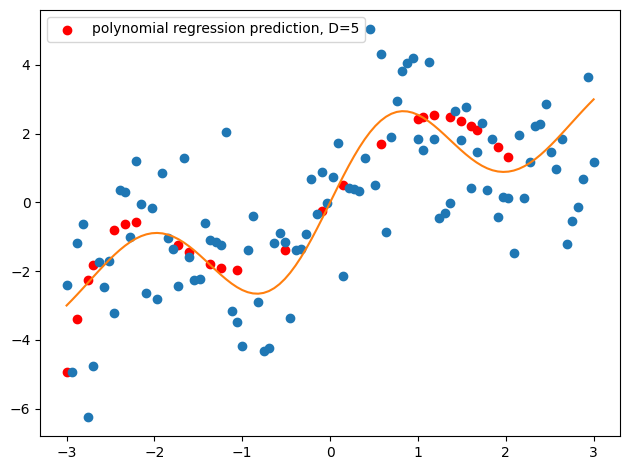

In [334]:
plt.figure()
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
# plotting the prediction values when D=5
plt.scatter(X_valid, y_pred, color='red', label="polynomial regression prediction, D=5")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


## **Answer :**
**We have a more repsentative result with D = 5, as we can see from the figure it is closer to real reprsentation (in orange).**

**(Question)** Using the validation set, implement a simple model selection strategy to optimize hyperparameter $D$ and print this value. For this question, you should limit the search to $D \in [1, 15]$.
To visualize potential underfitting and overfitting effects, plot the evolution of the error on the training and the validation sets for the different values of $D$.

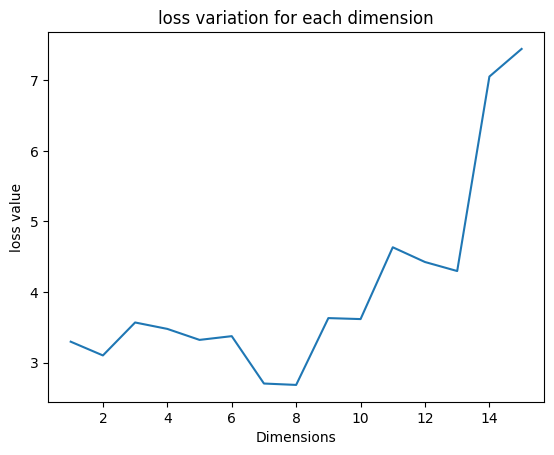

In [335]:
# finding the best degree by calculating the mse for each combination
error_values = np.empty((15,))
for i in range(1, 16) :
    pr = PolynomialRegression(D=i)
    X_poly_train, X_poly_valid = pr.make_poly(X_train), pr.make_poly(X_valid)
    pr.fit(X_poly_train, y_train)
    y_pred = pr.predict(X_poly_valid)
    mse = mean_squared_error(y_valid, y_pred)
    error_values[i-1] = mse


# plotting the graph
plt.figure()
plt.plot(range(1, 16), error_values)
plt.title("loss variation for each dimension")
plt.xlabel("Dimensions")
plt.ylabel("loss value")
plt.show()
plt.close()

**(Question)** Plot the fitted polynomial curve of the best model on top of the data points. Comment the results.

mse for PolynomialRegression D=8 : 2.6835233478522724


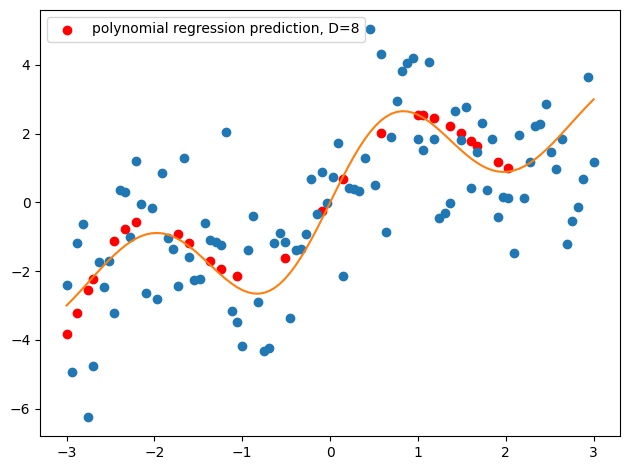

In [336]:
# getting the best dimension
d_best = np.argmin(error_values) + 1

# fitting and predicting with the best dimension
pr = PolynomialRegression(D=d_best)
X_poly_train, X_poly_valid = pr.make_poly(X_train), pr.make_poly(X_valid)
pr.fit(X_poly_train, y_train)
y_pred_best = pr.predict(X_poly_valid)

print("mse for PolynomialRegression D=8 :", mean_squared_error(y_pred_best, y_valid))

# plotting the predictions for D=8
plt.figure()
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
plt.scatter(X_valid, y_pred_best, color='red', label="polynomial regression prediction, D=8")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


## **Answer :**
**It is follows the same behavior as the real representation and it is very close to the real Y function.**

### 4. Regularized polynomial regression

Now, we want to implement polynomial regression with *weight decay* regularization:
$\hat{L}(\textbf{w}) = \frac{1}{N} \lVert \textbf{X} \textbf{w} - \textbf{y} \rVert^2 + \lambda \lVert\textbf{w}\rVert^2$

Here, $\lambda \geq 0$ is another hyperparameter of our model.

**(Question)** Complete the following `RegularizedPolynomialRegression` class.

In [337]:
class RegularizedPolynomialRegression():
    def __init__(self, D=1, lmbda=1.):
        assert D >=1 and lmbda >= 0.
        self.D = D
        self.lmbda = lmbda
        
    def fit(self, X, y):
        '''Apply polynomial linear regression to fit `X` to `y`.
        The result should be stored in an attribute `w`.'''
        # adding the lambda expression 
        XtX = np.dot(X.T, X)
        self.w = np.dot(np.dot(np.linalg.inv(self.lmbda*np.eye(XtX.shape[0]) + XtX), X.T), y)
        
    def predict(self, X):
        '''Assuming the model has already been fit, return
        predicted `y` values for given `X`.'''
        # checking if w exists
        if not hasattr(self, 'w') :
            raise AttributeError("fit the model before predicting X")
        return np.dot(X, self.w)

    def make_poly(self, X):
        '''Augment a dataset of 1D points (vector of size N) to its
        data matrix in polynomial form, including the zero column 
        (matrix of size N x D+1). Return the data matrix.'''
        assert X.ndim == 1
        # generates a D+1 dimesion arrays for each value in the X array.
        return np.vander(X, self.D+1, increasing=True)

**(Question)** Apply regularized linear regression and play around with hyperparameters $D$ and $\lambda$. Plot the result.

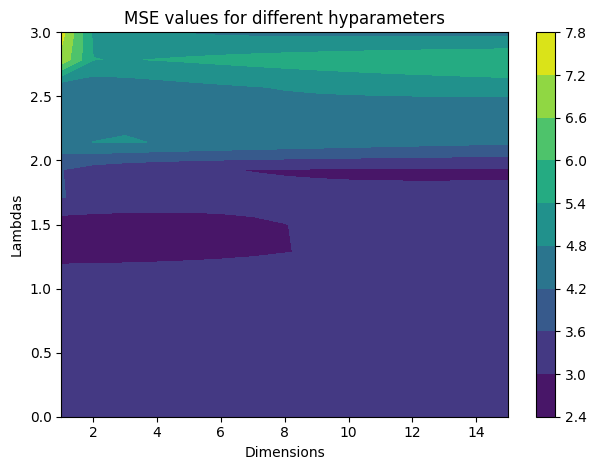

In [338]:
# generate intervals for dimensions and lambdas (15 values)
dims = np.array(range(1, 16))
lmbdas = np.linspace(0, 3, 15)
X_dims, Y_Lmbdas = np.meshgrid(dims, lmbdas)

# initializing the mse map
mse_values = np.zeros((len(dims), len(lmbdas)))

# for each dimension and lambda we fit and predict with the proper model
for i, dim in enumerate(dims) :
    for j, lmbda in enumerate(lmbdas) :
        rpr = RegularizedPolynomialRegression(D=dim, lmbda=lmbda)
        X_poly_train, X_poly_valid = rpr.make_poly(X_train), rpr.make_poly(X_valid)
        rpr.fit(X_poly_train, y_train)
        y_pred = rpr.predict(X_poly_valid)
        mse_values[i, j] = mean_squared_error(y_valid, y_pred)


# plot the mse map
plt.figure()
plt.contourf(X_dims, Y_Lmbdas, mse_values, cmap='viridis')
plt.colorbar()
plt.xlabel("Dimensions")
plt.ylabel("Lambdas")
plt.title("MSE values for different hyparameters")
plt.tight_layout()
plt.show()
plt.close()


mse for RegularizedPolynomialRegression for D=8, lambda=1.2 : 2.9433569212027906


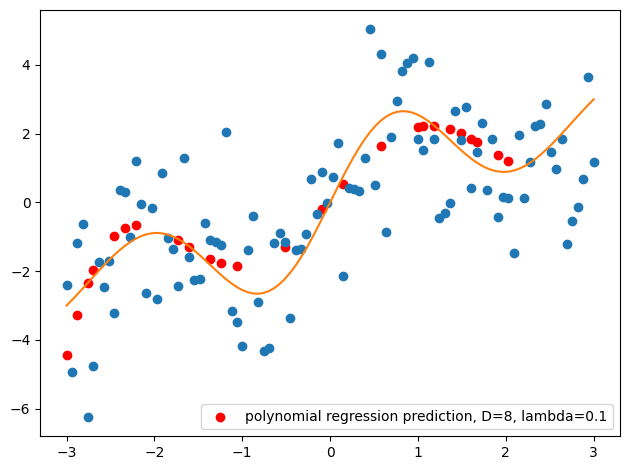

In [339]:
# plotting the prediction for the best combination according to the previous map
rpr = RegularizedPolynomialRegression(D=8, lmbda=1.2)
X_poly_train, X_poly_valid = rpr.make_poly(X_train), rpr.make_poly(X_valid)
rpr.fit(X_poly_train, y_train)
y_pred = rpr.predict(X_poly_valid)

print("mse for RegularizedPolynomialRegression for D=8, lambda=1.2 :", mean_squared_error(y_pred, y_valid))
plt.figure()
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
plt.scatter(X_valid, y_pred, color='red', label="polynomial regression prediction, D=8, lambda=0.1")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

### 5. Comparison with `sklearn`

In [340]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

**(Question)** Use the `sklearn` classes imported above to apply polynomial regression on our toy dataset. Compare the results with your implementation and comment.

In [341]:
# applying polynomial transformation
poly = PolynomialFeatures(degree=8)
X_train_transformed = poly.fit_transform(X_train.reshape(-1, 1))
X_valid_transformed = poly.fit_transform(X_valid.reshape(-1, 1))

In [342]:
# applying LinearRegression
linreg = LinearRegression()
linreg = linreg.fit(X_train_transformed, y_train)
y_pred_linreg = linreg.predict(X_valid_transformed)
print("mse Linear Regression: ", mean_squared_error(y_pred_linreg, y_valid))

mse Linear Regression:  2.6835233478509433


In [343]:
# applying Ridge
ridge = Ridge(alpha=1.2)
ridge = ridge.fit(X_train_transformed, y_train)
y_pred_ridge = ridge.predict(X_valid_transformed)
print("mse Ridge : ", mean_squared_error(y_pred_ridge, y_valid))

mse Ridge :  2.9423327814139992


## **Comment :**
**Using the same hyperparameters on both sklearn models and our models we've managed to have almost the same mse values, which legitimates our model's performance and precision.**